<a href="https://colab.research.google.com/github/arghac14/ML_journey/blob/master/knn(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [50]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names )
df=df.assign(label=iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
x=df.iloc[:,:4]
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.2, random_state=3)

In [78]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [88]:
k=25
scores={}
score_list=[]

for i in range(k):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores[i]=metrics.accuracy_score(y_test,y_pred)
  score_list.append(scores[i])
  
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 1])

**we fit and test the model for different values for K (from 1 to 25) using a for loop and record the KNN’s testing accuracy in a variable (scores**

**Plot the relationship between the values of K and the corresponding testing accuracy using the matplotlib library.**

**For our final model we can choose a optimal value of K as 5 (which falls between 3 and 19) and retrain the model with all the available data. And that will be our final model which is ready to make predictions.**

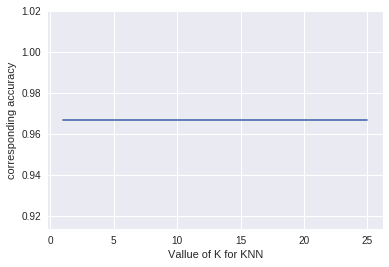

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range=range(1,k+1)
plt.plot(k_range,score_list)
plt.xlabel('Vallue of K for KNN')
plt.ylabel("corresponding accuracy")
plt.show()

In [91]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
classes={
    0:'Setosa',
    1:'Versicolor',
    2:'Virginica'
}

In [108]:
#prediction on new data

x_new=[[5.4,2.2,8.4,2.4],[5.1,3.5,1.4,0.2]]
result=knn.predict(x_new)
print(result)

for i in range(len(result)):
  print(classes[result[i]])

[2 0]
Virginica
Setosa
